<a href="https://colab.research.google.com/github/wahyunh10/Demand-Forecasting-Public-Bike-Rental-Project/blob/main/Clustering_Model_Standardization_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Model: Standardization Technique**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)
df.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
dfc = df.copy()
dfc.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dfc

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,12,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,12,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,12,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
dummy_season = pd.get_dummies(dfc.season, prefix='season')
dummy_season.sample(n=10,random_state = 12)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,0,0,0,1
2012-12-08 17:00:00,0,0,0,1
2011-06-10 17:00:00,0,1,0,0
2011-08-13 09:00:00,0,0,1,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,0,0,1,0
2011-12-17 16:00:00,0,0,0,1


In [6]:
dummy_weather = pd.get_dummies(dfc.weather, prefix='weather')
dummy_weather.sample(n=10, random_state = 12)

,weather_1,weather_2,weather_3,weather_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,1,0,0,0
2012-12-08 17:00:00,1,0,0,0
2011-06-10 17:00:00,1,0,0,0
2011-08-13 09:00:00,0,1,0,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,1,0,0,0
2011-12-17 16:00:00,1,0,0,0


In [7]:
dummy_hour = pd.get_dummies(dfc.hour, prefix='hour')
dummy_hour.sample(n=10, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-08-13 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-04 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-12-17 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
dfc = pd.concat([dfc, dummy_hour], axis=1)
dfc = pd.concat([dfc, dummy_weather], axis=1)
dfc = pd.concat([dfc, dummy_season], axis=1)

In [9]:
dfc.head(10)

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,5,1,0,0,2,9.84,12.880,75,6.0032,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,6,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,7,1,0,0,1,8.20,12.880,86,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,8,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0


In [10]:
dfc.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)
dfc.head(20)

,month,holiday,workingday,temp,humidity,windspeed,rentals,hour_0,hour_1,hour_2,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,0,0,9.84,75,6.0032,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,0,0,9.02,80,0.0000,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,0,0,8.20,86,0.0000,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,0,0,9.84,75,0.0000,8,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [11]:
dfc.columns

Index(['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'rentals', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [12]:
X = dfc[['temp','hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23','weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]

In [13]:
X.columns

Index(['temp', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [15]:
y = dfc[['rentals']]

# **Training & Testing Split**

In [16]:
from sklearn import metrics
from sklearn.model_selection import train_test_split # Standardization Technique

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=100)

# **KNN Model Building**

In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [19]:
rmse_val = [] # to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) # calculate rmse
    rmse_val.append(error) # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 121.84067140153302
RMSE value for k=  2 is: 106.03882319939324
RMSE value for k=  3 is: 99.51500156588276
RMSE value for k=  4 is: 98.6362904844924
RMSE value for k=  5 is: 96.19690555614304
RMSE value for k=  6 is: 94.56278049057222
RMSE value for k=  7 is: 93.34499109771129
RMSE value for k=  8 is: 92.97425318815344
RMSE value for k=  9 is: 92.3937601978966
RMSE value for k=  10 is: 92.13855640051106
RMSE value for k=  11 is: 92.10974190735598
RMSE value for k=  12 is: 92.0837322699574
RMSE value for k=  13 is: 92.43307690575163
RMSE value for k=  14 is: 92.61646083944763
RMSE value for k=  15 is: 92.35658055553397
RMSE value for k=  16 is: 92.38394280784112
RMSE value for k=  17 is: 92.53268945868955
RMSE value for k=  18 is: 92.43663579606185
RMSE value for k=  19 is: 92.3335880693961
RMSE value for k=  20 is: 92.35412304959515
RMSE value for k=  21 is: 92.14789512509093
RMSE value for k=  22 is: 92.16424243314522
RMSE value for k=  23 is: 92.14820114513334

Text(0, 0.5, 'RMSE Value')

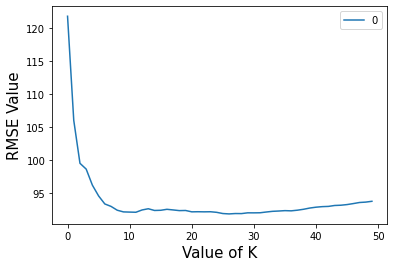

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('RMSE Value',fontsize=15)

In [21]:
np.where(curve[0]==min(curve[0])) # Find the lowest value for K from the plot above

(array([26]),)

# **Model Building**

In [22]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(27)
KNR.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=27)

In [23]:
predicted=KNR.predict(X_test)
predicted

array([[ 79.03703704],
       [405.7037037 ],
       [  7.81481481],
       ...,
       [ 56.22222222],
       [499.11111111],
       [ 84.44444444]])

In [24]:
metrics.mean_absolute_error(y_test,predicted)

63.7211126859368

In [25]:
metrics.mean_squared_error(y_test,predicted)

8433.180931565075

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,predicted))

91.83235231423114

In [27]:
new_df=y_test.copy()
new_df['pred']=predicted
new_df=new_df.sort_index()
new_df

,rentals,pred
datetime,,
2011-01-01 01:00:00,40,14.296296
2011-01-01 03:00:00,13,9.888889
2011-01-01 12:00:00,84,185.592593
2011-01-01 21:00:00,34,101.481481
2011-01-01 22:00:00,28,80.481481
...,...,...
2012-12-19 04:00:00,7,6.148148
2012-12-19 10:00:00,164,194.000000
2012-12-19 17:00:00,562,448.666667


Text(0, 0.5, 'Value of Bike Rental')

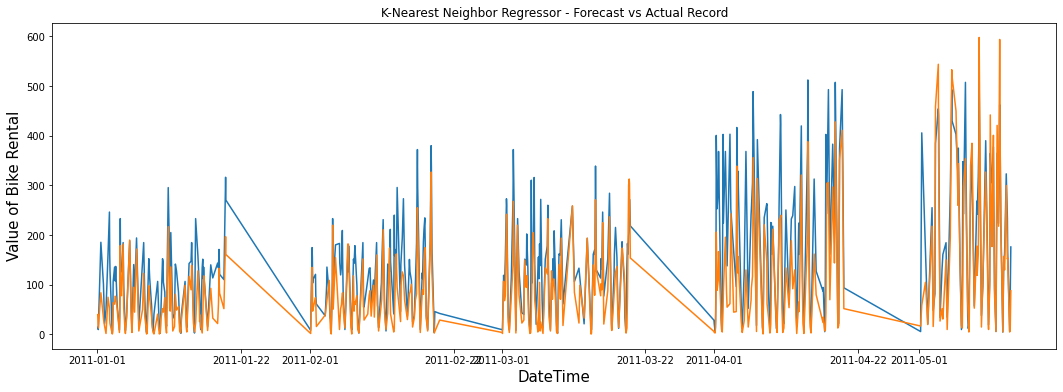

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(new_df['pred'][0:500])
plt.plot(new_df['rentals'][0:500])
plt.title('K-Nearest Neighbor Regressor - Forecast vs Actual Record')
plt.xlabel('DateTime',fontsize=15)
plt.ylabel('Value of Bike Rental',fontsize=15)